## Notebook 9B  - Mon/Tues
### Analyzing audio signals using the Fourier transform and power spectral density
### Total points: 5
#### PHYS 225 Intro to Computational Physics, Fall 2020

![FFT Time Frequency View](FFT-Time-Frequency-View.png)
By Phonical [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0), from Wikimedia Commons ([Link to original](https://upload.wikimedia.org/wikipedia/commons/6/61/FFT-Time-Frequency-View.png))

In [9]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Building periodic functions out of sines and cosines

Look at the [Interactive Fourier Series Graph](https://www.intmath.com/fourier-series/fourier-graph-applet.php) applet. Examine how square waves and triangle waves can be constructed by adding more and more terms of sine or cosine waves.

The general topic is called **Fourier series** or **Fourier analysis**.

### Here is an example of a Fourier Series for the **triangle wave**

Text(0.5, 0, 't')

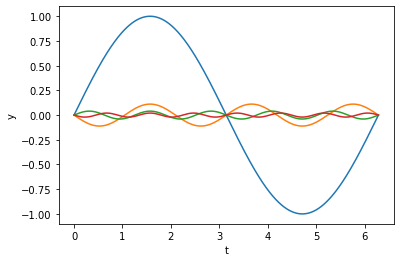

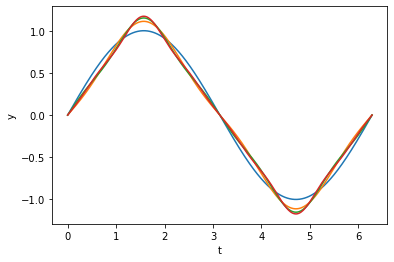

In [11]:
t = np.linspace(0,2*np.pi,500)  # one cycle of sine

y1 = np.sin(t)   # first term
y2 = -1/9 * np.sin(3*t)  # second term
y3 = 1/25 * np.sin(5*t) # third term
y4 = -1/49 * np.sin(7*t)  # fourth term

# plot the four terms individually
plt.figure()
plt.plot(t, y1)
plt.plot(t, y2)
plt.plot(t, y3)
plt.plot(t, y4)
plt.ylabel("y")
plt.xlabel("t")

# plot the sum of the four terms
plt.figure()
plt.plot(t, y1)
plt.plot(t, y1 + y2)
plt.plot(t, y1 + y2 + y3)
plt.plot(t, y1 + y2 + y3 + y4)
plt.ylabel("y")
plt.xlabel("t")

### Task 1: Generalize the sum of harmonics in previous example
1. **Pencil and Paper** Based on the equations for `y1`, `y2`, `y3`, and `y4` which are defined in the cell above, write a mathematical function for the $i$-th function in the series, $y_i(t)$ in terms of the index $i$ and the time $t$. Type your equation into the Markdown cell below.
1. Write a Python function that calculates the sum $\sum_{i=1}^N y_i(t)$
    * **Function Name:** `triangle_wave(t,N)`
    * **Inputs:**  `t` (time) and `N` (maximum order term)
    * **Returns:** `y` (amplitude of the triangle wave at time t)
    
1. Plot the triangle wave for $N=20$ and $t \in [0,2\pi]$.

**Hint:** Because the summation requires adding up successive terms, a `for` loop can be a good way to implement the summation.

**Write a LaTeX equation for your function $y_n(t)$ here**

-1.2187135778073837
1.2187135778073834
3.656465752565558e-17


Text(0.5, 0, 't')

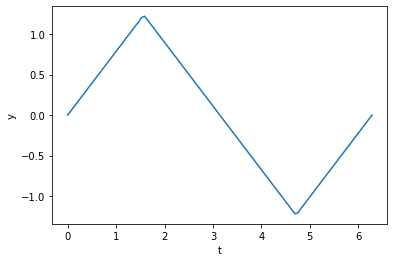

In [14]:
""" 1. Define the triangle_wave(t,N) function and 
    2. Plot the triangle_wave(t,N) function for N=20 """

### BEGIN SOLUTION
def triangle_wave(t,N) :
    y = 0
    for i in range(1,N + 1) :
        m = (2*i - 1)
        yi = (-1)**(i+1) / m**2 * np.sin(m * t)
        y = y + yi
        #print(y)
    return y

#triangle_wave(1,5) 

t = np.linspace(0,2*np.pi, 100)
y20 = triangle_wave(t,20)
#plt.plot(t,triangle_wave(t,3))
#plt.plot(t,triangle_wave(t,10))
plt.plot(t,y20)
print( y20.min() ) 
print( y20.max() ) 
print( y20.mean() ) 
plt.ylabel("y")
plt.xlabel("t")

### END SOLUTION

In [15]:
""" Test cases for the triangle_wave function """
t = np.linspace(0,2*np.pi, 100)
y20 = triangle_wave(t,20)
assert len(y20) == 100

assert abs(y20.min() - -1.2187135778) < 1e-5
assert abs(y20.max() - 1.2187135778) < 1e-5
assert abs(y20.mean() - 0) < 1e-5


## Example. Analysis of a G-major scale
The audio records three versions of the G-major scale on an accordion, cello, and [human](https://en.wikipedia.org/wiki/Human) voice.

[WAV audio format](https://www.abyssmedia.com/formats/wav-format.shtml) is uncompressed audio format that records the amplitude of the soundwave over time at a fixed sample rate. It is a very simple audio format, and similar to CSV data, can be read into Python easily. 

This example shows how to
1. Import a WAV audio file as data using `scipy.io.wavfile.read("filename.wav")` where `filename.wav` should be changed to match the name of your file.
1. Plot the waveform using `plt.plot`
1. Plot a spectrogram, which shows how the spectrum changes over time. `plt.specgram`

In [16]:
import scipy as sp
import scipy.io.wavfile  # allows WAV audio files to be imported as numpy arrays
import numpy as np
import matplotlib.pyplot as plt

In [17]:
rate, audio = scipy.io.wavfile.read("G_scale.wav")  # import the audio file

print("Shape of audio array = ", audio.shape)

left = audio[:,0]  # left /speaker 
right = audio[:,1] # right headphone/speaker

print("Samples per second: ", rate)  # number of samples per second
print("Total number of samples: ", len(left))

Shape of audio array =  (1254400, 2)
Samples per second:  44100
Total number of samples:  1254400


**Note** the data file has a huge number of rows (1.25 Million!), but only 2 columns. The columns represent the left and right audio channels (for stereo). 


**Why is there not a time column?** 
1. Audio signals keep a very regular sample rate that doesn't vary, so all you need is the number `rate` which is the sample rate and you can reconstruct the time array.
1. Not saving a time column results in a smaller file size, which is important when storing lots of audio data.

**We can calculate the length of the audio file** in seconds by taking the number of rows and divide by the sample rate. 

In [18]:
num_rows = audio.shape[0]
print("Number of rows/samples in waveform :", num_rows)

print("Duration of recording (s) :", num_rows/rate )

Number of rows/samples in waveform : 1254400
Duration of recording (s) : 28.444444444444443


### Create a plot of the waveform (amplitude vs time)

Text(0.5, 1.0, 'Graph of 1st note in G major scale')

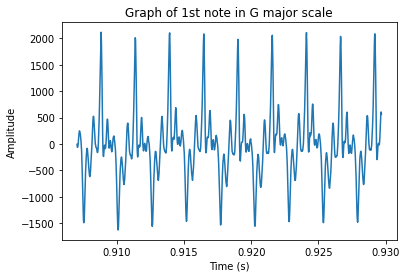

In [19]:
dt = 1/rate  # time step between samples

# the wave file does not store a time array, so it needs to be created
# the wave file only stores the "sample rate" in samples/second

# create a time array with the correct number of samples and step size
time = dt * np.arange(0,len(left))  

# I didn't plot the whole waveform since it is very long (over 1 million points)
plt.plot(time[40000:41000],left[40000:41000])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Graph of 1st note in G major scale")

### Wow! Create a spectrogram
You can play around with a dynamic visualization of a spectrogram on ("Chrome Experiments" website)[https://musiclab.chromeexperiments.com/Spectrogram/]. It may not work in all browsers, but it should work in Chrome.
![Spectrogram visualizers in Chrome](PS10B_Spectrogram_Chrome.PNG)

Beyond audio analysis, spectrograms are useful for visualzing all kinds of vibrations in science. Skim through these links.
* [Seismology](https://pnsn.org/spectrograms/what-is-a-spectrogram)
* [Bird song identification](https://academy.allaboutbirds.org/avian-vocal-behavior-sound-visualizations/)
* [Gravitational wave detection](https://www.ligo.caltech.edu/mit/image/ligo20171016f)



## matplotlib can also create spectrograms
Use the `plt.spectgram` function to visualize the spectrogram of a signal. 

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7558: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


Text(0, 0.5, 'Frequency (Hz)')

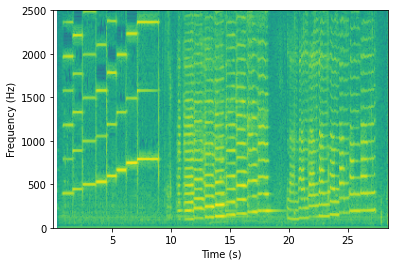

In [20]:
# Create a spectrogram of Dr. Zwickl's audio file. 
spectrum, freq, time, im = plt.specgram(left, Fs=44100, NFFT=4096, scale='dB')
plt.ylim(0,2500)
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

# three different instruments are playing the G-scale

### Task 2:  Record yourself or get an interesting audio clip online (5-30 seconds is preferrable)

1. Get an audio file (something with a simpler sound might be better, such as a vocal or instrumental solo).
    * Try an [online piano](https://www.onlinepianist.com/virtual-piano) or search for another instrument.
    * Record the audio on your phone. 
    * Windows computers should have "Windows Voice Recorder" installed.
1. [Convert your recorded audio file to a WAV file](https://audio.online-convert.com/convert-to-wav )
1. Upload the audio file in the directory where your Jupyter notebook is stored.
1. Create a spectrogram of the audio file
1. Can you understand the relationship between what you hear and what you see in the spectrogram?

In [21]:
""" Import the audio file and create spectrogram """

### BEGIN SOLUTION


### END SOLUTION

' Import the audio file and create spectrogram '

**Describe your interpretation of the spectrogram here**

In [22]:
assert True

## How is a spectragram calculated?
The basic steps are:
1. Pick a "time window" which represents a subset of the data.
1. Compute the Power Spectral Density (i.e., "periodogram") for the time window.
1. Slide the window along the data set.

## Example: Periodogram of the Triangle Wave

This example shows how to use the `scipy.signal.periodogram()` function. Also look at the [official docoumentation](https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.signal.periodogram.html) for the `periodogram` function.


In [23]:
from scipy import signal  # required for the power spectral density

Compute a `triangle_wave` waveform.

Text(0, 0.5, 'Amplitude (a.u.)')

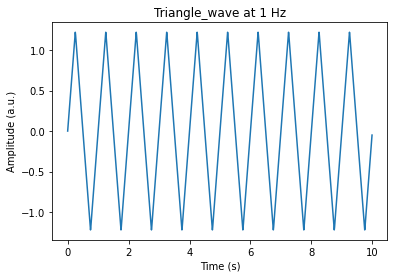

In [24]:
f_fund = 1  # fundamental (lowest) frequency in the series
w_fund = 2*np.pi*f_fund # fundamental angular frequency in the series

rate = 100  # 100 sample per second  
dt = 1/rate # time step between samples
t = np.arange(0,1000,dt)  # capture 50 oscillations

# plot the triangle wave with a period of T = 1 s
y = triangle_wave(w_fund*t,20)
plt.figure()

# plot the first 10 seconds of the wave
plt.plot(t[:1000],y[:1000])
plt.title("Triangle_wave at 1 Hz")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (a.u.)")

In the next example we compute and plot the Power Spectral Density (PSD) of the triangle wave shown above.

Note: 
* `plt.plot` uses a linear scale for x and y axes.
* `plt.semilogy` uses a log scale for y axis, which is good for graphs where y changes over several orders of magnitude.

(0.0, 16.0)

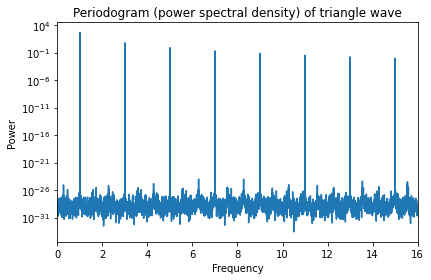

In [25]:
# compute the power spectral density
freqs, psd = scipy.signal.periodogram(y, fs=rate)

# plot the power spectral density
plt.semilogy(freqs, psd, '-')   # log scale on the y-axis.
plt.title('Periodogram (power spectral density) of triangle wave')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.xlim(0,16)

Reflect on the graph (you are not required to write down your answer, just look closely at the graph).  
Are all the hamonics present ($f_0, 2f_0, 3f_0, 4f_0,...$)? Or just the odd ones ($f_0, 3f_0, 5f_0,...$)?

### Task 3 : Compute the Periodogram (a.k.a., power spectral density) for two audio files

1. Import the audio files `Voice_ooo.wav` and `Voice_eee.wav`, which correspond to a skilled vocalist singing the vowel sounds "oooo" and "eeee".
1. Mimic the example above to **calculate and plot** the periodogram (i.e., power spectral densitiy) for the two audio files.

44100
44100


(0.0001, 1000000.0)

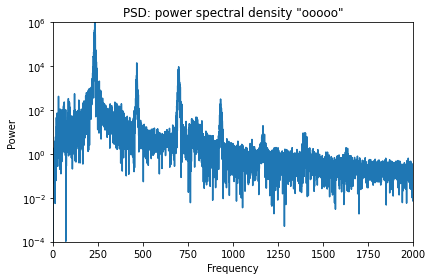

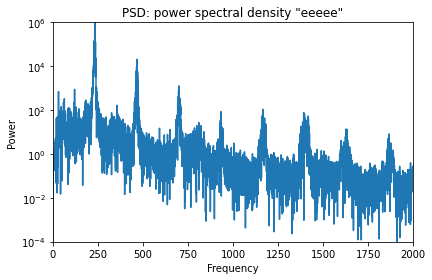

In [26]:
""" Power Spectral Densities. Import audio and plot Power Spectral Density """

### BEGIN SOLUTION ###
rate, audio = scipy.io.wavfile.read("Voice_ooo.wav")
left = audio[:,0]  # left headphone 
right = audio[:,1] # right headphone
print(rate)  # number of samples per second

freqs, psd = scipy.signal.periodogram(left, fs=rate)

plt.semilogy(freqs, psd, '-')
plt.title('PSD: power spectral density "ooooo"')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.xlim(0,2000)
plt.ylim(1e-4,1e6)

plt.figure()

rate, audio = scipy.io.wavfile.read("Voice_eee.wav")
left = audio[:,0]  # left headphone 
right = audio[:,1] # right headphone
print(rate)  # number of samples per second

freqs, psd = scipy.signal.periodogram(left, fs=rate)

plt.semilogy(freqs, psd, '-')
plt.title('PSD: power spectral density "eeeee"')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.xlim(0,2000)
plt.ylim(1e-4,1e6)



### END SOLUTION ###


Reflect on your graphs: How does the spectrum of harmonics differ between "ooooo" and "eeeee"?

In [27]:
""" Test case for Periodogram of vowel sounds """
assert True

## Discussion of the Fast Fourier Transform (FFT)

Foundational for calculating a **spectrogram** or a **power spectral density** is a way to effeciently calculate the Fourier Transform. The algorithm is called the Fast Fourier Transform (FFT) (see [Wikipedia](https://en.wikipedia.org/wiki/Fast_Fourier_transform) for more info). 

This example shows how to 
1. compute the FFT of a signal and display it. 
1. Plot the absolute value squared of the FFT, which is closely related to the Perdiodogram (i.e., Power Spectral Density).

(0.0, 5.0)

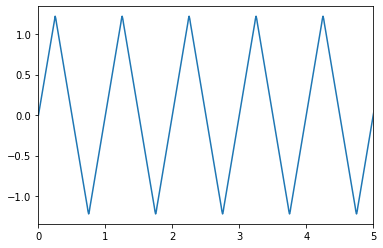

In [28]:
f_fund = 1  # fundamental (lowest) frequency in the series
w_fund = 2*np.pi*f_fund # fundamental angular frequency in the series

rate = 100  # 100 sample per second  
dt = 1/rate # time step between samples
t = np.arange(0,1000,dt)  # capture 50 oscillations

# plot the triangle wave with a period of T = 1 s
y = triangle_wave(w_fund*t,20)
plt.plot(t,y),
plt.xlim(0,5)

Now look at the Fast Fourier Transform results. I plot the absolute value since the values can be complex numbers.

Text(0.5, 1.0, 'Zoomed in spectrum')

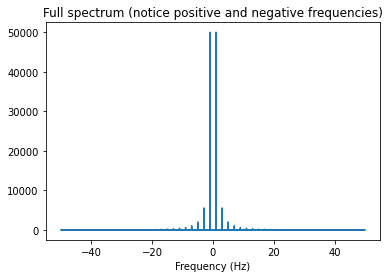

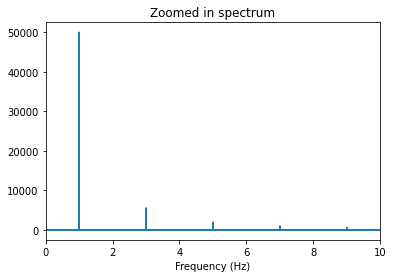

In [29]:
yfft = np.fft.fft(y)  # the fast fourier transform
freqs = np.fft.fftfreq(len(yfft), d = dt)  # calculate an array of frequencies

plt.figure()
plt.plot(freqs,abs(yfft))
plt.xlabel("Frequency (Hz)")
plt.title("Full spectrum (notice positive and negative frequencies)")

plt.figure()
plt.plot(freqs,abs(yfft))
plt.xlabel("Frequency (Hz)")
plt.xlim(0,10)
plt.title("Zoomed in spectrum")

The takeaway of the previous plot is that the Fast Fourier Transform show the same pattern of frequencies (1 Hz, 3 Hz, 5 Hz, ...) as in the original definition of the `triangle_wave` function.

### Task 4: Be curious. Ask your instructor two questions about Fourier Transforms, Power Spectral Density, etc. 
1. Type your questions in the box below. 
1. Don't leave before asking your instructor a question.

**Type your questions here!**

In [30]:
""" test cases for the questions about FFT, PSD, etc. """
assert True